 #  Anomaly Detection Prediction

--------------------------------------------------------------------------------------------------------------------------------------------------------------------



## Context

This Notebook will focus on anomaly detection and predict a financial fraud based on a dataset that contains information about various financial transactions, each represented by several features:

Transaction_ID: Unique identifier for each transaction. 

Transaction_Amount: The monetary value of the transaction. 

Transaction_Volume: The quantity or number of items/actions involved in the transaction. 

Average_Transaction_Amount: The historical average transaction amount for the account. 

Frequency_of_Transactions: How often transactions are typically performed by the account. 

Time_Since_Last_Transaction: Time elapsed since the last transaction. 

Day_of_Week: The day of the week when the transaction occurred. 

Time_of_Day: The time of day when the transaction occurred. 

Age: Age of the account holder. 

Gender: Gender of the account holder. 

Income: Income of the account holder. 

Account_Type: Type of account (e.g., personal, business). 

## Load the Dataset 

In [1]:
# Importation of libraries 

# Basic Tools
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import scipy

# ML Tools
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# Load the dataset 

df = pd.read_csv("transaction_anomalies_dataset.csv")

df.head()

,Transaction_ID,Transaction_Amount,Transaction_Volume,Average_Transaction_Amount,Frequency_of_Transactions,Time_Since_Last_Transaction,Day_of_Week,Time_of_Day,Age,Gender,Income,Account_Type
0,TX0,1024.835708,3,997.234714,12,29,Friday,06:00,36,Male,1436074,Savings
1,TX1,1013.952065,4,1020.210306,7,22,Friday,01:00,41,Female,627069,Savings
2,TX2,970.956093,1,989.496604,5,12,Tuesday,21:00,61,Male,786232,Savings
3,TX3,1040.822254,2,969.522480,16,28,Sunday,14:00,61,Male,619030,Savings
4,TX4,998.777241,1,1007.111026,7,7,Friday,08:00,56,Female,649457,Savings


## Data Overview

In [3]:
# Shape

df.shape

(1000, 12)

In [4]:
# Info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Transaction_ID               1000 non-null   object 
 1   Transaction_Amount           1000 non-null   float64
 2   Transaction_Volume           1000 non-null   int64  
 3   Average_Transaction_Amount   1000 non-null   float64
 4   Frequency_of_Transactions    1000 non-null   int64  
 5   Time_Since_Last_Transaction  1000 non-null   int64  
 6   Day_of_Week                  1000 non-null   object 
 7   Time_of_Day                  1000 non-null   object 
 8   Age                          1000 non-null   int64  
 9   Gender                       1000 non-null   object 
 10  Income                       1000 non-null   int64  
 11  Account_Type                 1000 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 93.9+ KB


In [5]:
# Statistical overview concerning numerical value 

df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Transaction_Amount,1000.0,1038.122511,283.580055,849.024392,966.028796,1002.118678,1.033144e+03,3.227459e+03
Transaction_Volume,1000.0,2.498000,1.115006,1.000000,1.000000,3.000000,3.000000e+00,4.000000e+00
Average_Transaction_Amount,1000.0,1000.682506,20.632334,939.081423,986.800556,1000.501902,1.015156e+03,1.073154e+03
Frequency_of_Transactions,1000.0,12.078000,4.245225,5.000000,8.000000,12.000000,1.600000e+01,1.900000e+01
Time_Since_Last_Transaction,1000.0,15.341000,8.361258,1.000000,8.000000,16.000000,2.200000e+01,2.900000e+01
Age,1000.0,40.641000,13.819953,18.000000,29.000000,41.000000,5.300000e+01,6.400000e+01
Income,1000.0,894823.839000,345356.222598,300159.000000,591730.750000,887664.500000,1.178102e+06,1.499670e+06


In [6]:
# Missins Values 

df.isna().sum()

Transaction_ID                 0
Transaction_Amount             0
Transaction_Volume             0
Average_Transaction_Amount     0
Frequency_of_Transactions      0
Time_Since_Last_Transaction    0
Day_of_Week                    0
Time_of_Day                    0
Age                            0
Gender                         0
Income                         0
Account_Type                   0
dtype: int64

## EDA 

### Data Visualisation of parameters 

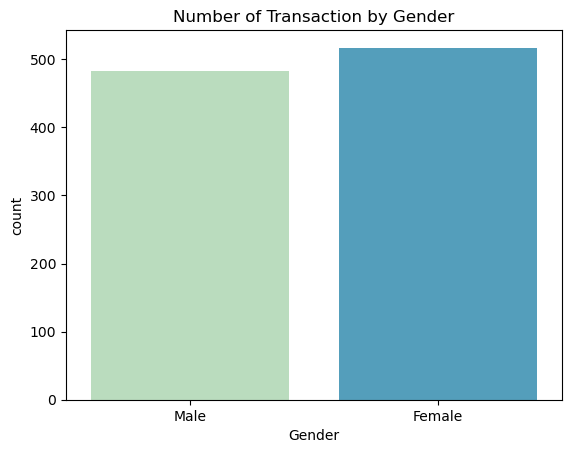

In [7]:
# Gender 
sns.countplot(data = df, x = 'Gender', palette='GnBu')
plt.title("Number of Transaction by Gender")
plt.show()

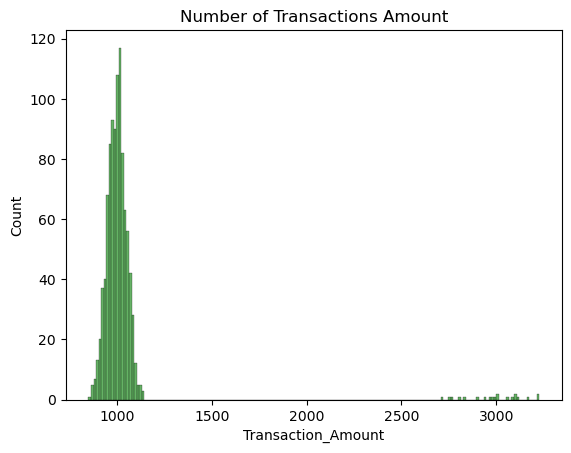

In [8]:
# Define 

sns.histplot(data = df, x = 'Transaction_Amount', color='green', alpha = 0.6)
plt.title("Number of Transactions Amount")
plt.show()

We can observe a increase of transaction where the amount is 1000 but we can alson identify some big transaction auround of 3000. 

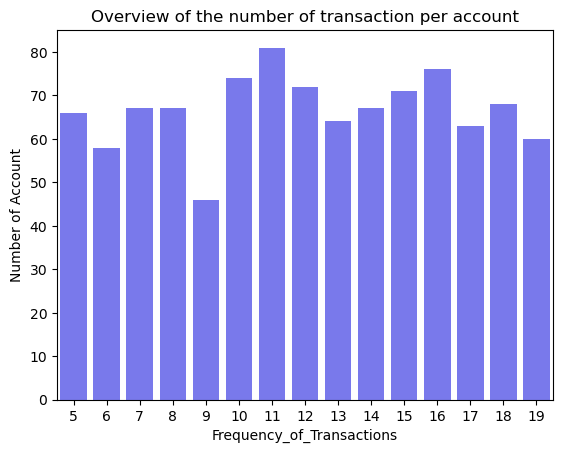

In [9]:
#Frequency of transaction per Account (Overview)

sns.countplot(data = df, x = 'Frequency_of_Transactions', color='blue', alpha = 0.6)
plt.title("Overview of the number of transaction per account")
plt.ylabel("Number of Account")
plt.show()

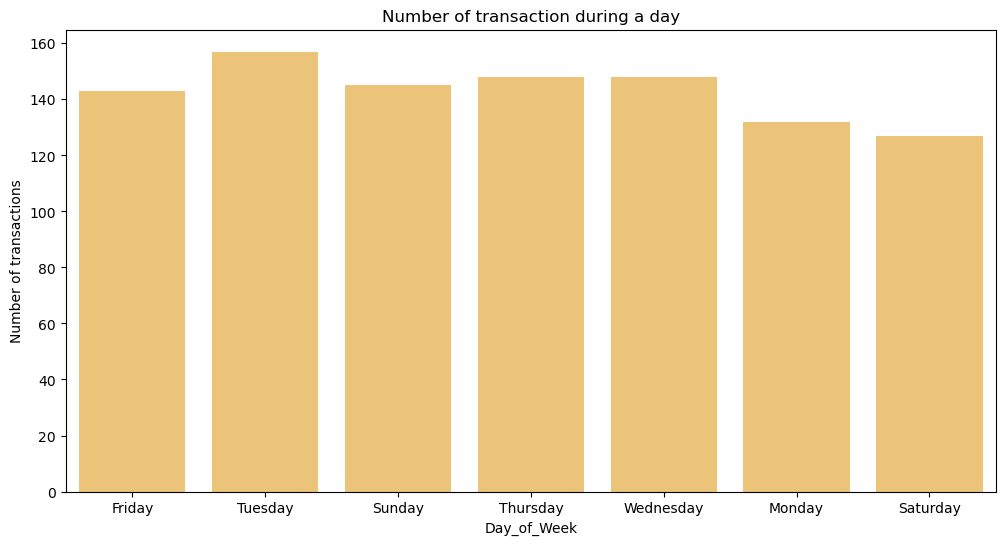

In [10]:
# Number of transaction during a day 

plt.figure(figsize=(12,6))
sns.countplot(data=df, x='Day_of_Week', color='orange', alpha=0.6)
plt.title("Number of transaction during a day")
plt.ylabel("Number of transactions")
plt.show()

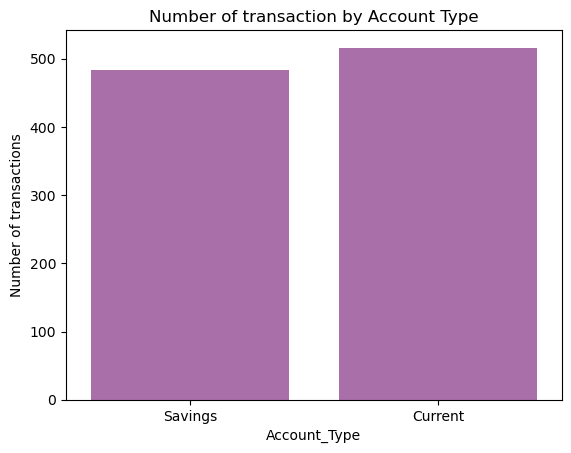

In [11]:
# Type of Account that serve for the transaction

sns.countplot(data=df, x='Account_Type', color='purple', alpha=0.6)
plt.title("Number of transaction by Account Type")
plt.ylabel("Number of transactions")
plt.show()

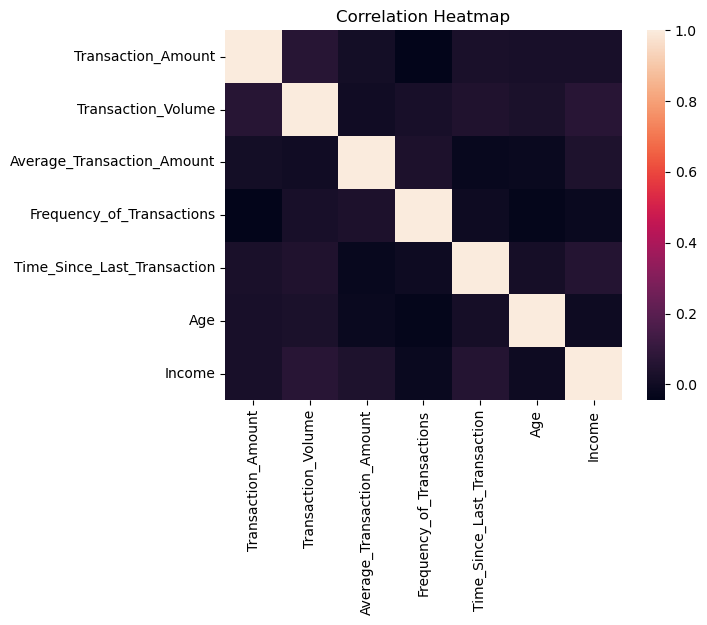

In [12]:
# HeatMap 

df_num = df.select_dtypes('number')
df_num = pd.DataFrame(df_num)

correlation_matrix = df_num.corr()
sns.heatmap(correlation_matrix)
plt.title("Correlation Heatmap")
plt.show()

There is no real correlation between variables 

## Data Preprocessing 

In [13]:
# Remove columns that are not interresting 

df_ML = df.drop(columns=["Age", "Gender"])

df_ML

,Transaction_ID,Transaction_Amount,Transaction_Volume,Average_Transaction_Amount,Frequency_of_Transactions,Time_Since_Last_Transaction,Day_of_Week,Time_of_Day,Income,Account_Type
0,TX0,1024.835708,3,997.234714,12,29,Friday,06:00,1436074,Savings
1,TX1,1013.952065,4,1020.210306,7,22,Friday,01:00,627069,Savings
2,TX2,970.956093,1,989.496604,5,12,Tuesday,21:00,786232,Savings
3,TX3,1040.822254,2,969.522480,16,28,Sunday,14:00,619030,Savings
4,TX4,998.777241,1,1007.111026,7,7,Friday,08:00,649457,Savings
...,...,...,...,...,...,...,...,...,...,...
995,TX995,901.138758,3,976.363229,17,19,Monday,05:00,424746,Savings
996,TX996,928.962516,4,1028.292292,10,25,Wednesday,09:00,908278,Current
997,TX997,950.921600,2,1022.823424,13,28,Friday,02:00,1353498,Current
998,TX998,933.291962,4,994.325450,10,8,Tuesday,04:00,359072,Savings


In [14]:
# Deal with outliers 

#Transform the amount with a log transformation

df_ML['Log_Transaction_Amount'] = np.log1p(df_ML['Transaction_Amount'])  # Transformation log

df_ML

,Transaction_ID,Transaction_Amount,Transaction_Volume,Average_Transaction_Amount,Frequency_of_Transactions,Time_Since_Last_Transaction,Day_of_Week,Time_of_Day,Income,Account_Type,Log_Transaction_Amount
0,TX0,1024.835708,3,997.234714,12,29,Friday,06:00,1436074,Savings,6.933263
1,TX1,1013.952065,4,1020.210306,7,22,Friday,01:00,627069,Savings,6.922597
2,TX2,970.956093,1,989.496604,5,12,Tuesday,21:00,786232,Savings,6.879311
3,TX3,1040.822254,2,969.522480,16,28,Sunday,14:00,619030,Savings,6.948727
4,TX4,998.777241,1,1007.111026,7,7,Friday,08:00,649457,Savings,6.907532
...,...,...,...,...,...,...,...,...,...,...,...
995,TX995,901.138758,3,976.363229,17,19,Monday,05:00,424746,Savings,6.804768
996,TX996,928.962516,4,1028.292292,10,25,Wednesday,09:00,908278,Current,6.835144
997,TX997,950.921600,2,1022.823424,13,28,Friday,02:00,1353498,Current,6.858483
998,TX998,933.291962,4,994.325450,10,8,Tuesday,04:00,359072,Savings,6.839789


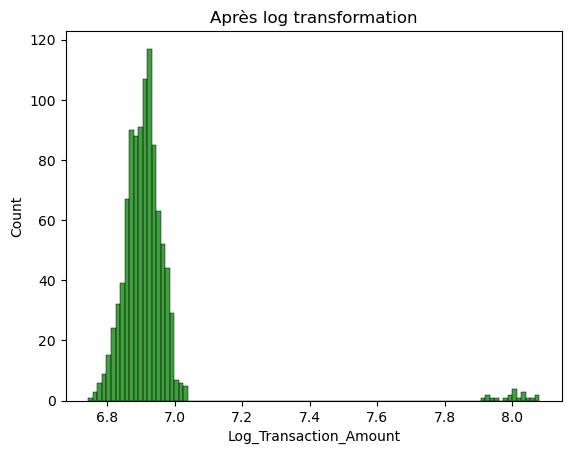

In [15]:
# After log transformation 

sns.histplot(df_ML["Log_Transaction_Amount"], bins=100, color='green')
plt.title("Après log transformation")
plt.show()

In [16]:
encoder = LabelEncoder()
df_ML['Account_Type'] = encoder.fit_transform(df_ML['Account_Type'])
df_ML['Day_of_Week'] = encoder.fit_transform(df_ML['Day_of_Week'])
plt.show()
df_ML

,Transaction_ID,Transaction_Amount,Transaction_Volume,Average_Transaction_Amount,Frequency_of_Transactions,Time_Since_Last_Transaction,Day_of_Week,Time_of_Day,Income,Account_Type,Log_Transaction_Amount
0,TX0,1024.835708,3,997.234714,12,29,0,06:00,1436074,1,6.933263
1,TX1,1013.952065,4,1020.210306,7,22,0,01:00,627069,1,6.922597
2,TX2,970.956093,1,989.496604,5,12,5,21:00,786232,1,6.879311
3,TX3,1040.822254,2,969.522480,16,28,3,14:00,619030,1,6.948727
4,TX4,998.777241,1,1007.111026,7,7,0,08:00,649457,1,6.907532
...,...,...,...,...,...,...,...,...,...,...,...
995,TX995,901.138758,3,976.363229,17,19,1,05:00,424746,1,6.804768
996,TX996,928.962516,4,1028.292292,10,25,6,09:00,908278,0,6.835144
997,TX997,950.921600,2,1022.823424,13,28,0,02:00,1353498,0,6.858483
998,TX998,933.291962,4,994.325450,10,8,5,04:00,359072,1,6.839789


In [17]:
#Standardization of Data 

scaler = StandardScaler()

df_ML["Time_of_Day"] = pd.to_datetime(df_ML["Time_of_Day"])

# In seconds
df_ML["Time_of_Day_Seconds"] = (
    df_ML["Time_of_Day"].dt.hour * 3600 + 
    df_ML["Time_of_Day"].dt.minute * 60 + 
    df_ML["Time_of_Day"].dt.second
)
          
features = ['Log_Transaction_Amount', 'Frequency_of_Transactions', 'Time_of_Day_Seconds', 'Time_Since_Last_Transaction']


df_ML[features] = scaler.fit_transform(df_ML[features])

df_ML

/var/folders/31/f6f90nl96tz9p_gycytcy5zc0000gn/T/ipykernel_47630/3380889199.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_ML["Time_of_Day"] = pd.to_datetime(df_ML["Time_of_Day"])


,Transaction_ID,Transaction_Amount,Transaction_Volume,Average_Transaction_Amount,Frequency_of_Transactions,Time_Since_Last_Transaction,Day_of_Week,Time_of_Day,Income,Account_Type,Log_Transaction_Amount,Time_of_Day_Seconds
0,TX0,1024.835708,3,997.234714,-0.018383,1.634423,0,2025-03-01 06:00:00,1436074,1,0.033921,-0.830339
1,TX1,1013.952065,4,1020.210306,-1.196766,0.796810,0,2025-03-01 01:00:00,627069,1,-0.032319,-1.546642
2,TX2,970.956093,1,989.496604,-1.668119,-0.399781,5,2025-03-01 21:00:00,786232,1,-0.301136,1.318571
3,TX3,1040.822254,2,969.522480,0.924324,1.514764,3,2025-03-01 14:00:00,619030,1,0.129955,0.315746
4,TX4,998.777241,1,1007.111026,-1.196766,-0.998076,0,2025-03-01 08:00:00,649457,1,-0.125871,-0.543817
...,...,...,...,...,...,...,...,...,...,...,...,...
995,TX995,901.138758,3,976.363229,1.160000,0.437833,1,2025-03-01 05:00:00,424746,1,-0.764062,-0.973599
996,TX996,928.962516,4,1028.292292,-0.489736,1.155787,6,2025-03-01 09:00:00,908278,0,-0.575420,-0.400557
997,TX997,950.921600,2,1022.823424,0.217294,1.514764,0,2025-03-01 02:00:00,1353498,0,-0.430483,-1.403381
998,TX998,933.291962,4,994.325450,-0.489736,-0.878417,5,2025-03-01 04:00:00,359072,1,-0.546575,-1.116860


In [18]:
# Definition of the model 
iso_forest = IsolationForest(
    n_estimators=100,        # Nb of trees
    max_samples='auto',      # (auto = size oof dataset)
    contamination=0.02,      # % of anomalies
    max_features=1.0,        # Nb features per tree
    random_state=42
)

# Train
iso_forest.fit(df_ML[features])

# Prediction (fraud = -1, normal = 1)
df_ML['Anomaly_Score'] = iso_forest.predict(df_ML[features])

# Convert into 0 (normal) et 1 (fraud)
df_ML['Fraud'] = df_ML['Anomaly_Score'].apply(lambda x: 1 if x == -1 else 0)

print(df_ML['Fraud'].value_counts())


Fraud
0    980
1     20
Name: count, dtype: int64


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


> ####  So we have a ratio of anomaly of 0.02 

#### Visualization Clustering Anomaly 

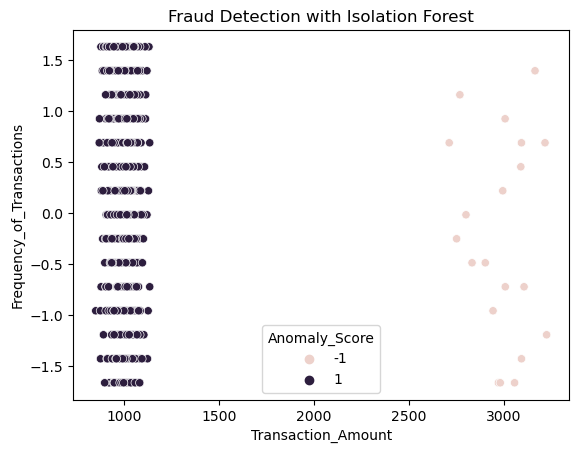

In [19]:
df_ML['Anomaly_Score'] = iso_forest.predict(df_ML[features])
sns.scatterplot(data=df_ML, x="Transaction_Amount", y="Frequency_of_Transactions", hue=df_ML['Anomaly_Score'])
plt.title("Fraud Detection with Isolation Forest")
plt.show()

As the dataset is not labelled, one method is to create groups of anomalies using unsupervised clustering (such as K-Means):

The AUC-ROC (Area Under Curve - Receiver Operating Characteristic) measures the model's ability to distinguish between fraud and normal.

 - AUC = 1.0 ➝ The model detects fraud perfectly.

 - AUC = 0.5 ➝ The model is as good as chance.

 - AUC < 0.5 ➝ The model does worse than chance (it detects normals as frauds and vice versa).

In [20]:
from sklearn.cluster import KMeans
from sklearn.metrics import roc_auc_score

# Two clusters normal (0) et fraud (1)
kmeans = KMeans(n_clusters=2, random_state=42)
df_ML['Cluster'] = kmeans.fit_predict(df_ML[features])

# Verification of Isolation Forrest that detects well or not clusters 
df_ML['Anomaly_Score'] = iso_forest.predict(df_ML[features])
df_ML['Fraud'] = df_ML['Anomaly_Score'].apply(lambda x: 1 if x == -1 else 0)

# Calculate AUC-ROC by considering clustering as "pseudo-label"
auc = roc_auc_score(df_ML['Cluster'], df_ML['Fraud'])
print(f"AUC-ROC Score (based on Clustering - True Label): {auc:.4f}")

AUC-ROC Score (based on Clustering - True Label): 1.0000


> #### So our model detects frauds !

 #  Authour

## Adel BELGROUN

--------------------------------------------------------------------------------------------------------------------------------------------------------------------